<a href="https://colab.research.google.com/github/kopeomojola/Tokyo2020/blob/main/Olympic_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis with an RNN

<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/drive/1EaAYMOMrPz9bR6URojmgO1Ta9rwavCo1#scrollTo=dLvpRCsE-GnC">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/kopeomojola/Tokyo2020/blob/main/Olympic_Sentiment_Analysis.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>

## Sentiment Analysis with an Recurrent Neural Network

We will use a RNN for sentiment analysis because we care for the sequence in the data.

### Imports
Importing numpy for 

In [3]:
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

### Loading in Dataset

In [4]:
url = 'https://raw.githubusercontent.com/kopeomojola/Tokyo2020/main/datas.csv'
data = pd.read_csv(url)
data = data.sample(frac=1).reset_index(drop=True)
print(data.shape)
data.head()

(9868, 10)


,Unnamed: 0,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,3596,Members of the International Olympic Committee...,members of the international olympic committee...,0.10000,0.250000,positive,0.000,0.906,0.094,0.3612
1,9870,"FAHAMMMMM ,a big no tengok samaa ayah or orang...",fahammmmm a big no tengok samaa ayah or orang...,0.00000,0.100000,negative,0.081,0.919,0.000,-0.2960
2,8509,@iconiksongs She had just come out from the mo...,she had just come out from the mother pool a...,0.28125,0.625000,positive,0.000,0.764,0.236,0.7579
3,5844,THAT WOMAN IS OLYMPIC GOLD MEDALIST CHLOE KIM,that woman is olympic gold medalist chloe kim,0.00000,0.000000,neutral,0.000,1.000,0.000,0.0000
4,2858,@JJustice112 @ModernDayZorro @rickygantz @reac...,lol i already know the story you...,0.65000,0.766667,positive,0.121,0.703,0.176,0.1779


Removing all columns except the sentiment and text column.

In [5]:
data = data[['sentiment', 'text']]
data.head()

,sentiment,text
0,positive,members of the international olympic committee...
1,negative,fahammmmm a big no tengok samaa ayah or orang...
2,positive,she had just come out from the mother pool a...
3,neutral,that woman is olympic gold medalist chloe kim
4,positive,lol i already know the story you...


### Data exploration

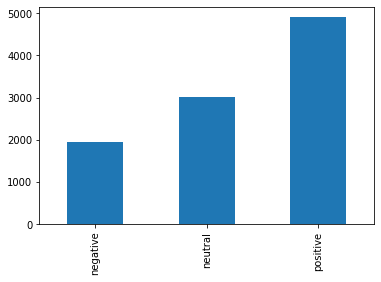

In [6]:
data['sentiment'].value_counts().sort_index().plot.bar()

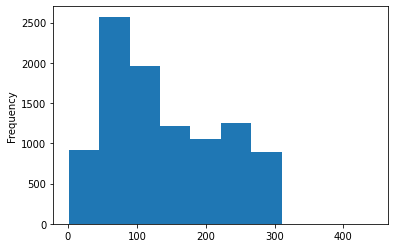

In [7]:
data['text'].str.len().plot.hist()

### Preprocessing

In [9]:
data['text'] = data['text'].str.replace('@', '')
data.head()

,sentiment,text
0,positive,members of the international olympic committee...
1,negative,fahammmmm a big no tengok samaa ayah or orang...
2,positive,she had just come out from the mother pool a...
3,neutral,that woman is olympic gold medalist chloe kim
4,positive,lol i already know the story you...


In [10]:
data['text'].apply(lambda x: x.lower()) #transform text to lowercase
data['text'] = data['text'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x))
data['text'].head()

0    members of the international olympic committee...
1    fahammmmm  a big no tengok samaa ayah or orang...
2      she had just come out from the mother pool a...
3        that woman is olympic gold medalist chloe kim
4                lol  i already know the story  you...
Name: text, dtype: object

In [11]:
tokenizer = Tokenizer(num_words=5000, split=" ")
tokenizer.fit_on_texts(data['text'].values)

X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X) # padding our text vector so they all have the same length
X[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  479,
           8,    1,  210,    2,  158,   26,    6,  752,  865,    3,  106,
        1692,  519,  387,   12,  529,    3,  252,  242,   94,   33,   20,
          47,    6,  239],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           

### Creating model

In [12]:
model = Sequential()
model.add(Embedding(5000, 256, input_length=X.shape[1]))
model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
model.add(LSTM(256, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 80, 256)           1280000   
                                                                 
 dropout (Dropout)           (None, 80, 256)           0         
                                                                 
 lstm (LSTM)                 (None, 80, 256)           525312    
                                                                 
 lstm_1 (LSTM)               (None, 256)               525312    
                                                                 
 dense (Dense)               (None, 3)                 771       
                                                                 
Total params: 2,331,395
Trainable params: 2,331,395
Non-trainable params: 0
_________________________________________________________________


In [14]:
y = pd.get_dummies(data['sentiment']).values
[print(data['sentiment'][i], y[i]) for i in range(0,5)]

positive [0 0 1]
negative [1 0 0]
positive [0 0 1]
neutral [0 1 0]
positive [0 0 1]


[None, None, None, None, None]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Training model

In [16]:
batch_size = 32
epochs = 8

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/8
247/247 - 305s - loss: 0.7749 - accuracy: 0.6715 - 305s/epoch - 1s/step
Epoch 2/8
247/247 - 297s - loss: 0.4099 - accuracy: 0.8485 - 297s/epoch - 1s/step
Epoch 3/8
247/247 - 298s - loss: 0.2507 - accuracy: 0.9166 - 298s/epoch - 1s/step
Epoch 4/8
247/247 - 299s - loss: 0.1867 - accuracy: 0.9417 - 299s/epoch - 1s/step
Epoch 5/8
247/247 - 302s - loss: 0.1381 - accuracy: 0.9568 - 302s/epoch - 1s/step
Epoch 6/8
247/247 - 301s - loss: 0.1022 - accuracy: 0.9687 - 301s/epoch - 1s/step
Epoch 7/8
247/247 - 301s - loss: 0.0871 - accuracy: 0.9729 - 301s/epoch - 1s/step
Epoch 8/8
247/247 - 302s - loss: 0.0842 - accuracy: 0.9735 - 302s/epoch - 1s/step


In [17]:
model.save('sentiment_analysis.h5')

### Testing model

In [18]:
predictions = model.predict(X_test)

[print(data['text'][i], predictions[i], y_test[i]) for i in range(0, 5)]

members of the international olympic committee are arriving in vancouver monday to see whether b c  is ready to host another winter games   this time in 2030      [3.9855385e-04 4.0861682e-04 9.9919277e-01] [0 0 1]
fahammmmm  a big no tengok samaa ayah or orang orang tua   after tengok match olympic ritu dengan ayah  aku memilih untuk tengok sendiri  sakit telinga sakit hati [0.01614763 0.0046126  0.9792397 ] [0 0 1]
  she had just come out from the mother pool after winning the gold medal in the 100m major slay at the mother olympics [8.5919950e-05 1.9405875e-04 9.9972004e-01] [0 0 1]
that woman is olympic gold medalist chloe kim [0.64041156 0.01113045 0.34845802] [0 0 1]
            lol  i already know the story  your cognitive dissonance is olympic level  you support child sexual assault and you re yacking at me about bible verses  [1.3477901e-04 1.9355959e-04 9.9967170e-01] [0 0 1]


[None, None, None, None, None]

In [19]:
pos_count, neu_count, neg_count = 0, 0, 0
real_pos, real_neu, real_neg = 0, 0, 0
for i, prediction in enumerate(predictions):
    if np.argmax(prediction)==2:
        pos_count += 1
    elif np.argmax(prediction)==1:
        neu_count += 1
    else:
        neg_count += 1
    
    if np.argmax(y_test[i])==2:
        real_pos += 1
    elif np.argmax(y_test[i])==1:    
        real_neu += 1
    else:
        real_neg +=1

print('Positive predictions:', pos_count)
print('Neutral predictions:', neu_count)
print('Negative predictions:', neg_count)
print('Real positive:', real_pos)
print('Real neutral:', real_neu)
print('Real negative:', real_neg)

Positive predictions: 1055
Neutral predictions: 622
Negative predictions: 297
Real positive: 974
Real neutral: 607
Real negative: 393


In [23]:
total_result = int(real_pos) + int(real_neu) + int(real_neg)
print(total_result)

per_real_pos = (real_pos/total_result)*100
per_real_neu = (real_neu/total_result)*100
per_real_neg = (real_neg/total_result)*100
print(per_real_pos)
print(per_real_neu)
print(per_real_neg)
total_percentage = per_real_neg + per_real_pos + per_real_neu
print(total_percentage)

1974
49.34143870314083
30.749746707193516
19.908814589665656
100.0


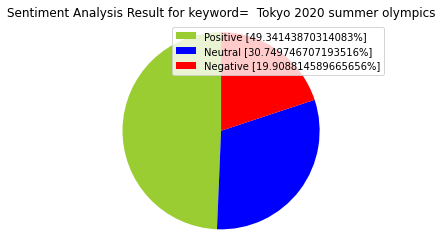

In [24]:
keyword = "Tokyo 2020 summer olympics"
labels = ['Positive ['+str(per_real_pos)+'%]' , 'Neutral ['+str(per_real_neu)+'%]','Negative ['+str(per_real_neg)+'%]']
sizes = [real_pos, real_neu, real_neg]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()